## Resolviendo Ecuaciones Diferenciales Ordinarias con Julia

    1. Algunos métodos básicos
    2. Uso de la librería DifferentialEquations

In [1]:
using Plots

In [2]:
include("odes_lib.jl")

RK4 (generic function with 2 methods)

In [5]:
function oscilador(u, t, p)
    α, β , ω = p
    return [α*u[2] ; -α*u[1] + β*cos(ω * t)]
end

oscilador (generic function with 1 method)

In [6]:
u0 = [1. ; 0.]
intervalo = (0., 10.)
p = (1.0, 0.0, 0.0)
N = 100
ODEproblem(RK4,oscilador,u0,intervalo,N,p)

([0.0, 0.10101010101010101, 0.20202020202020202, 0.30303030303030304, 0.40404040404040403, 0.5050505050505051, 0.6060606060606061, 0.7070707070707071, 0.8080808080808081, 0.9090909090909091  …  9.090909090909095, 9.191919191919196, 9.292929292929296, 9.393939393939396, 9.494949494949497, 9.595959595959597, 9.696969696969697, 9.797979797979798, 9.898989898989898, 9.999999999999998], [1.0 0.99490281733178 … -0.8896561211993852 -0.8390756193948381; 0.0 -0.10083833265141295 … 0.4566295458500776 0.5440134615380428])

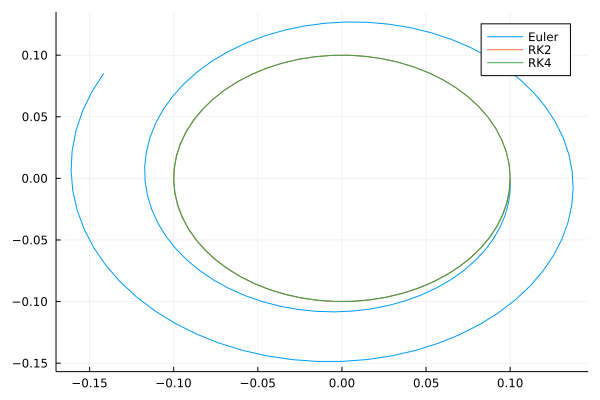

In [7]:
N=100
y0 = [0.1;0.0]
intervalo = (0.,10.)
t_s1, y_s1 = ODEproblem(Euler, oscilador, y0, intervalo, N, p)
t_s2, y_s2 = ODEproblem(RK2, oscilador, y0, intervalo, N, p)
t_s4, y_s4 = ODEproblem(RK4, oscilador, y0, intervalo, N, p)

plot(y_s1[1,:],y_s1[2,:], label="Euler")
plot!(y_s2[1,:],y_s2[2,:], label="RK2")
plot!(y_s4[1,:],y_s4[2,:], label="RK4")

Ahora vamos a usar una librería [https://diffeq.sciml.ai/stable/tutorials/ode_example/](https://diffeq.sciml.ai/stable/tutorials/ode_example/)

In [8]:
import Pkg; Pkg.add("OrdinaryDiffEq")
using OrdinaryDiffEq
import Pkg; Pkg.add("DifferentialEquations")
using DifferentialEquations

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
┌ Info: Precompiling OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1423
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1423


In [9]:
function lorenz!(du,u,p,t)
    du[1] = p[1]*(u[2]-u[1])
    du[2] = u[1]*(p[2]-u[3]) - u[2]
    du[3] = u[1]*u[2] - p[3]*u[3]
end

lorenz! (generic function with 1 method)

In [14]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
pl = (10.0, 28.0, 8/3)
prob = OrdinaryDiffEq.ODEProblem(lorenz!,u0,tspan,pl)
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 1289-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624087100077666
   0.009058076582749423
   0.016956470605311864
   0.027689959227781235
   0.04185635103821218
   0.060240410627700816
   0.0836854113984534
   0.11336499269451543
   0.14862181409827
   0.18703978025370946
   ⋮
  99.3397852599881
  99.40421692882006
  99.4725041528708
  99.5412045549744
  99.6085310903818
  99.67192934036703
  99.72954041869967
  99.78291962638104
  99.84176034083528
  99.90666445162192
  99.98069072555015
 100.0
u: 1289-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591550149778, 0.08977063252764937, 0.0001438019170127846]
 [0.924204355043198, 0.242289149116772, 0.0010461625397616113]
 [0.8800455796215916, 0.4387364900041282, 0.0034242599

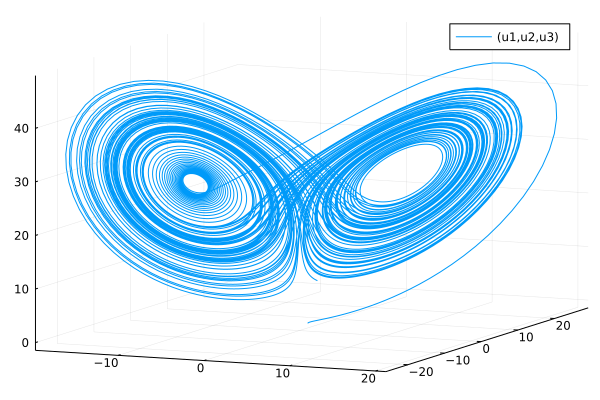

In [15]:
plot(sol,vars=(1,2,3))

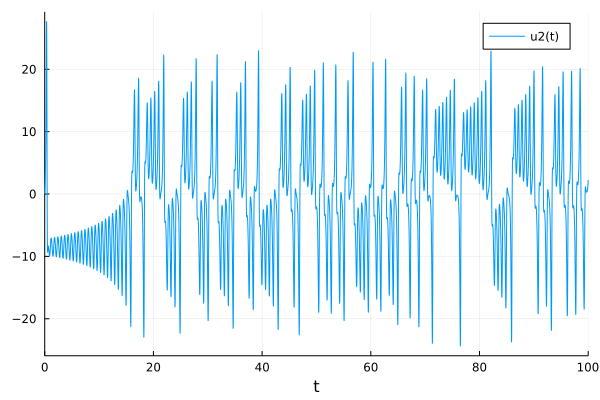

In [16]:
plot(sol,vars=(0,2))

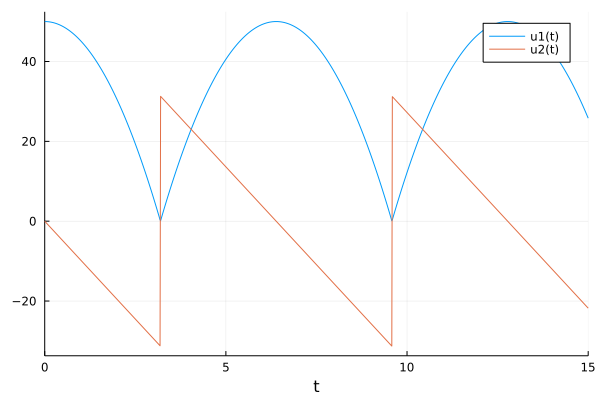

In [19]:
function pelota(du,u,p,t)
    du[1] = u[2]
    du[2] = -p[1] - p[2]*u[2]
  end

function condition(u,t,integrator) # Event when event_f(u,t) == 0
    u[1]
end

function affect!(integrator)
    integrator.u[2] = -integrator.u[2]
end

cb = ContinuousCallback(condition,affect!)

u0 = [50.0,0.0]
tspan = (0.0,15.0)
p = [9.8, 0.0]
prob = ODEProblem(pelota,u0,tspan,p)
sol = solve(prob,Tsit5(),callback=cb)
plot(sol)


### Cientos de métodos! [https://diffeq.sciml.ai/stable/solvers/ode_solve/](https://diffeq.sciml.ai/stable/solvers/ode_solve/)

Otras propiedades:

1. Manejando, paralelizando (threads, MPI, GPU) y analizando grandes sistemas (Monte Carlo)
2. Almacenado en formatos tabulados `DataFrames` and `CSV`s
3. Manejo de eventos
4. Estimación de Parametros (problemas inversos, ML) 
5. Quantificación de los errores numéricos y propagación de errores 
6. Vinculación con Symbolics

